In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from math import sin, cos, pi

def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)

In [2]:
def trajectory(theta,speed=20,height=0,dt=0.01,g=-9.81):
    vx=speed*cos(pi*theta/180)
    vz=speed*sin(pi*theta/180)    
    t,x,z=0,0,height
    ts,xs,zs=[t],[x],[z]
    while z>=0:
        t+=dt
        vz+=g*dt
        x+=vx*dt
        z+=vz*dt
        ts.append(t)
        xs.append(x)
        zs.append(z)
    return ts,xs,zs

In [3]:
def plot_trajectories(*trajs,show_seconds=False):
    for traj in trajs:
        xs, zs=traj[1], traj[2]
        plt.plot(xs,zs)
        if show_seconds:
            second_indices=[]
            second=0
            for i,t in enumerate(traj[0]):
                if t>=second:
                    second_indices.append(i)
                    second+=1
            plt.scatter([xs[i] for i in second_indices], [zs[i] for i in second_indices])
    xl=plt.xlim()
    plt.plot(plt.xlim(),[0,0],c='k')
    plt.xlim(*xl)
    
    width=7
    coords_height=(plt.ylim()[1] - plt.ylim()[0])
    coords_width=(plt.xlim()[1] - plt.xlim()[0])
    plt.gcf().set_size_inches(width, width*coords_height/coords_width)

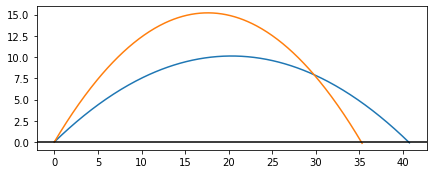

In [4]:
plot_trajectories(
    trajectory(45),
    trajectory(60)
)

In [5]:
def landing_position(traj):
    return traj[1][-1]

In [6]:
def hang_time(traj):
    return traj[0][-1]

In [7]:
def max_height(traj):
    return max(traj[2])

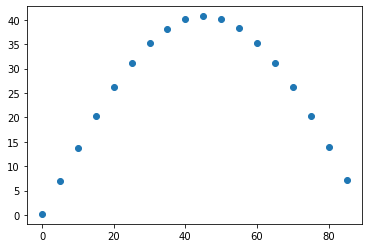

In [8]:
import matplotlib.pyplot as plt
angles=range(0,90,5)
landing_positions=[landing_position(trajectory(theta)) for theta in angles]
plt.scatter(angles,landing_positions)

In [9]:
landing_position(trajectory(50))

40.10994684444007

In [10]:
landing_position(trajectory(130))

-40.10994684444007

In [11]:
def plot_trajectories(*trajs,show_seconds=False):
    for traj in trajs:
        xs, zs=traj[1], traj[2]
        plt.plot(xs,zs)
        if show_seconds:
            second_indices=[]
            second=0
            for i,t in enumerate(traj[0]):
                if t>=second:
                    second_indices.append(i)
                    second+=1
            plt.scatter([xs[i] for i in second_indices],
                        [zs[i] for i in second_indices])
    xl=plt.xlim()
    plt.plot(plt.xlim(),[0,0],c='k')
    plt.xlim(*xl)
    
    width=7
    coords_height=(plt.ylim()[1] - plt.ylim()[0])
    coords_width=(plt.xlim()[1] - plt.xlim()[0])
    plt.gcf().set_size_inches(width, width*coords_height/coords_width)

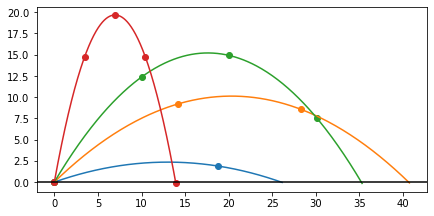

In [12]:
plot_trajectories(
    trajectory(20),
    trajectory(45),
    trajectory(60),
    trajectory(80),
    show_seconds=True
)

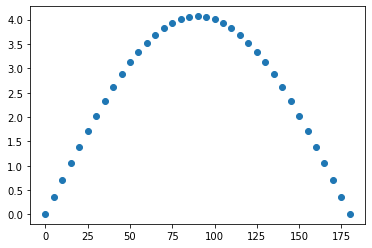

In [13]:
test_angles=range(0,181,5)
hang_times=[hang_time(trajectory(theta)) for theta in test_angles]
plt.scatter(test_angles,hang_times)

In [14]:
def plot_trajectory_metric(metric,thetas,**settings):
    plt.scatter(thetas,
               [metric(trajectory(theta,**settings))
               for theta in thetas])

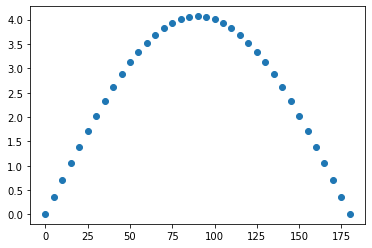

In [15]:
plot_trajectory_metric(hang_time,range(0,181,5))

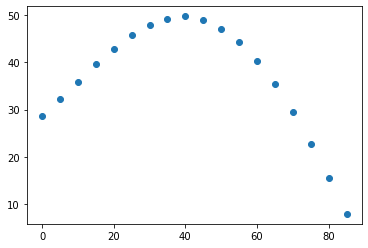

In [16]:
plot_trajectory_metric(landing_position,range(0,90,5),height=10)

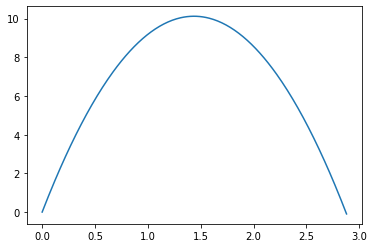

In [17]:
trj=trajectory(45)
ts,zs=trj[0],trj[2]
plt.plot(ts,zs)

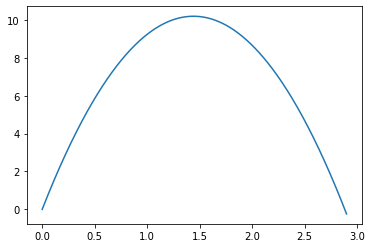

In [18]:
def z(t):
    return 20*sin(45*pi/180)*t+(-9.81/2)*t**2

plot_function(z,0,2.9)

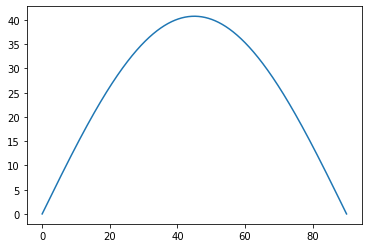

In [19]:
def r(theta):
    return (-2*20*20/-9.81*sin(theta*pi/180)*cos(theta*pi/180))

plot_function(r,0,90)

In [20]:
r(45)

40.774719673802245

In [21]:
r(135)

-40.77471967380224

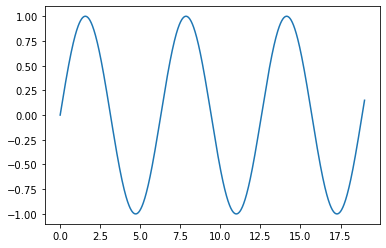

In [22]:
plot_function(sin,0,19)

In [25]:
def trajectory3d(theta,phi,speed=20,height=0,dt=0.01,g=-9.81):
    vx=speed*cos(pi*theta/180)*cos(pi*phi/180)
    vy=speed*cos(pi*theta/180)*sin(pi*phi/180)
    vz=speed*sin(pi*theta/180)
    t,x,y,z=0,0,0,height
    ts,xs,ys,zs=[t],[x],[y],[z]
    while z>=0:
        t+=dt
        vz+=g*dt
        x+=vx*dt
        y+=vy*dt
        z+=vz*dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts,xs,ys,zs

In [26]:
def flat_ground(x,y):
    return 0

In [27]:
def ridge(x,y):
    return (x**2-5*y**2)/2500

In [28]:
def trajectory3d(theta,phi,speed=20,height=0,dt=0.01,g=-9.81,elevation=flat_ground):
    vx=speed*cos(pi*theta/180)*cos(pi*phi/180)
    vy=speed*cos(pi*theta/180)*sin(pi*phi/180)
    vz=speed*sin(pi*theta/180)
    t,x,y,z=0,0,0,height
    ts,xs,ys,zs=[t],[x],[y],[z]
    while z>=elevation(x,y):
        t+=dt
        vz+=g*dt
        x+=vx*dt
        y+=vy*dt
        z+=vz*dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts,xs,ys,zs

In [37]:
def plot_trajectories_3d(*trajs,elevation=flat_ground,bounds=None,zbounds=None,shadows=False):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    fig.set_size_inches(7,7)    

    if not bounds:
        xmin = min([x for traj in trajs for x in traj[1]])
        xmax = max([x for traj in trajs for x in traj[1]])
        ymin = min([x for traj in trajs for x in traj[2]])
        ymax = max([x for traj in trajs for x in traj[2]])

        padding_x = 0.1 * (xmax-xmin)
        padding_y = 0.1 * (ymax-ymin)
        xmin -= padding_x
        xmax += padding_x
        ymin -= padding_y
        ymax += padding_x
    
    else:
        xmin, xmax, ymin, ymax = bounds
    

    plt.plot([xmin,xmax],[0,0],[0,0],c='k')
    plt.plot([0,0],[ymin,ymax],[0,0],c='k')

    g = np.vectorize(elevation)
    ground_x = np.linspace(xmin, xmax, 20)
    ground_y = np.linspace(ymin, ymax, 20)
    ground_x, ground_y = np.meshgrid(ground_x,ground_y)
    ground_z = g(ground_x,ground_y)
    ax.plot_surface(ground_x, ground_y, ground_z, cmap=cm.coolwarm, alpha=0.5,
                       linewidth=0, antialiased=True)
    for traj in trajs:
        ax.plot(traj[1],traj[2],traj[3])
        if shadows:
            ax.plot([traj[1][0],traj[1][-1]],[traj[2][0],traj[2][-1]],[0,0],c='gray',linestyle='dashed')
    
    if zbounds:
        ax.set_zlim(*zbounds)

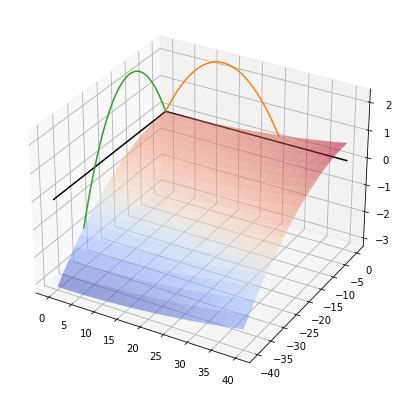

In [38]:
plot_trajectories_3d(
    trajectory3d(20,0,elevation=ridge),
    trajectory3d(20,270,elevation=ridge),
    bounds=[0,40,-40,0],
    elevation=ridge
)

In [52]:
B=0.0004
C=0.005
v=20
g=-9.81

def velocity_component(v,theta,phi):
    vx=v*cos(pi*theta/180)*cos(pi*phi/180)
    vy=v*cos(pi*theta/180)*sin(pi*phi/180)
    vz=v*sin(pi*theta/180)
    return vx,vy,vz

def landing_distance(theta,phi):
    vx,vy,vz=velocity_component(v,theta,phi)
    v_xy=sqrt(vx**2+vy**2)
    a=(g/2)-B*vx**2+C*vy**2
    b=vz
    landing_time=-b/a
    landing_distance=v_xy*landing_time
    return landing_distance

In [53]:
trajectory3d(30,240,elevation=ridge)

([0,
  0.01,
  0.02,
  0.03,
  0.04,
  0.05,
  0.060000000000000005,
  0.07,
  0.08,
  0.09,
  0.09999999999999999,
  0.10999999999999999,
  0.11999999999999998,
  0.12999999999999998,
  0.13999999999999999,
  0.15,
  0.16,
  0.17,
  0.18000000000000002,
  0.19000000000000003,
  0.20000000000000004,
  0.21000000000000005,
  0.22000000000000006,
  0.23000000000000007,
  0.24000000000000007,
  0.25000000000000006,
  0.26000000000000006,
  0.2700000000000001,
  0.2800000000000001,
  0.2900000000000001,
  0.3000000000000001,
  0.3100000000000001,
  0.3200000000000001,
  0.3300000000000001,
  0.34000000000000014,
  0.35000000000000014,
  0.36000000000000015,
  0.37000000000000016,
  0.38000000000000017,
  0.3900000000000002,
  0.4000000000000002,
  0.4100000000000002,
  0.4200000000000002,
  0.4300000000000002,
  0.4400000000000002,
  0.45000000000000023,
  0.46000000000000024,
  0.47000000000000025,
  0.48000000000000026,
  0.49000000000000027,
  0.5000000000000002,
  0.5100000000000002,
 

limit_output extension: Maximum message size of 10000 exceeded with 19332 characters

In [54]:
landing_distance(30,240)

45.46065111729336

In [55]:
def trajectory3d(theta,phi,speed=20,height=0,dt=0.01,g=-9.81,elevation=flat_ground,drag=0):
    vx=speed*cos(pi*theta/180)*cos(pi*phi/180)
    vy=speed*cos(pi*theta/180)*sin(pi*phi/180)
    vz=speed*sin(pi*theta/180)
    t,x,y,z=0,0,0,height
    ts,xs,ys,zs=[t],[x],[y],[z]
    while z>=elevation(x,y):
        t+=dt
        vx-=(drag*vx)*dt
        vy-=(drag*vy)*dt
        vz+=(g-(drag*vz))*dt
        x+=vx*dt
        y+=vy*dt
        z+=vz*dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts,xs,ys,zs